# Digital Geopolitics and Electoral Influence: A Data Science Perspective

**Table of contents**<a id='toc0_'></a>    
- 1. [Problem Definition](#toc1_)    
- 2. [Getting Started](#toc2_)    
  - 2.1. [Load Libraries](#toc2_1_)    
  - 2.2. [Load Dataset](#toc2_2_)    
- 3. [Exploratory Data Analysis](#toc3_)    
  - 3.1. [Descriptive Statistics](#toc3_1_)    
    - 3.1.1. [mg_cities](#toc3_1_1_)    
    - 3.1.2. [tse_ibge](#toc3_1_2_)    
    - 3.1.3. [partidos](#toc3_1_3_)    
    - 3.1.4. [despesas](#toc3_1_4_)    
  - 3.2. [Data Visualisation](#toc3_2_)    
  - 3.3. [Time Series Analysis](#toc3_3_)    
- 4. [Data Preparation](#toc4_)    
  - 4.1. [Data Cleaning](#toc4_1_)    
  - 4.2. [Feature Selection](#toc4_2_)    
- 5. [Evaluate Algorithms and Models](#toc5_)    
  - 5.1. [Train/Test Split](#toc5_1_)    
  - 5.2. [Test Options and Evaluation Metrics](#toc5_2_)    
  - 5.3. [Compare Models and Algorithms](#toc5_3_)    
    - 5.3.1. [Machine Learning models-scikit-learn](#toc5_3_1_)    
    - 5.3.2. [Time Series based Models-ARIMA and LSTM](#toc5_3_2_)    
- 6. [Model Tuning and Grid Search](#toc6_)    
- 7. [Finalise the model](#toc7_)    
  - 7.1. [Result on the test dataset](#toc7_1_)    
  - 7.2. [Save Model for Later Use](#toc7_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Problem Definition](#toc0_)

In the current landscape of digital geopolitics, the control of data, digital infrastructures, and online narratives has directly influenced electoral processes. Social media platforms play a central role in shaping public opinion and mobilizing the electorate, impacting political strategies and voting decisions. According to DataSenado, in the 2018 elections, 45% of voters decided their vote based on information obtained from social media, highlighting the growing relevance of these platforms in the electoral context.

This study investigates the relationship between partisan digital investment and municipal election results, focusing on the presence of spatial correlation patterns among neighboring municipalities. The analysis considers variables such as per capita income, IDEB (Basic Education Development Index), business presence, and digital advertising investment. The choice of Minas Gerais as the study unit is justified by its socioeconomic diversity and the significant increase in electoral investment in social media in recent years.

By exploring these factors, the research aims to provide insights for political parties, electoral managers, and researchers, contributing to the improvement of campaign strategies and the development of policies aimed at regulating digital electoral advertising and promoting transparency in the democratic process.

*Research Questions*

1. What is the impact of digital advertising investment on the electoral performance of political parties?
2. Which socioeconomic and political factors influence voter behavior in municipal elections?
3. Is there spatial autocorrelation in voting patterns and digital investments among neighboring municipalities?
4. How do social media platforms contribute to public opinion formation and voter mobilization?
5. How do political parties use digital advertising to influence public debate and win votes?
6. What are the implications of this phenomenon for political campaign planning and public policy development?

## 2. <a id='toc2_'></a>[Getting Started](#toc0_)

In [2]:
rm(list = ls())
gc()

options(warn = -1)
options(repr.matrix.max.cols=1000, repr.matrix.max.rows=10)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,671219,35.9,1391154,74.3,1391154,74.3
Vcells,1227283,9.4,8388608,64.0,1816400,13.9


### 2.1. <a id='toc2_1_'></a>[Load Libraries](#toc0_)

In [47]:
library(conflicted)
library(dplyr)
library(sf)
library(psych)
library(skimr)
library(DataExplorer)
library(VIM)
library(gridExtra)
library(ggplot2)

### 2.2. <a id='toc2_2_'></a>[Load Dataset](#toc0_)

In [48]:
dir <- '../_data/digital-geopolitics/'

mg_cities <- st_read(paste0(dir, 'DUR2021_Municipios.shp')) |> st_drop_geometry() |> as.data.frame() |> dplyr::filter(cd_uf == 31)
tse_ibge <- read.csv(paste0(dir, 'municipios_brasileiros_tse.csv')) |> dplyr::filter(uf == 'MG')
partidos <- read.csv(paste0(dir, 'partidos.csv'))
despesas <- read.csv2(paste0(dir, 'despesas_contratadas_candidatos_2024_MG.csv'), fileEncoding = "latin1", stringsAsFactors = FALSE, skipNul = TRUE)

Reading layer `DUR2021_Municipios' from data source 
  `/home/bzescossia/data-science-projects/_data/digital-geopolitics/DUR2021_Municipios.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 5570 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -73.99045 ymin: -33.75118 xmax: -28.84764 ymax: 5.271841
Geodetic CRS:  SIRGAS 2000


## 3. <a id='toc3_'></a>[Exploratory Data Analysis](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Descriptive Statistics](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[mg_cities](#toc0_)

In [49]:
mg_cities_2 <- mg_cities |> 
    dplyr::select(-c(3:17))

description <- mg_cities_2 |> 
  skim()

print(description)

── Data Summary ────────────────────────
                           Values     
Name                       mg_cities_2
Number of rows             853        
Number of columns          2          
_______________________               
Column type frequency:                
  character                2          
________________________              
Group variables            None       

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 cd_mun                0             1   7   7     0      853          0
2 nm_mun                0             1   3  30     0      853          0


In [50]:
mg_cities <- mg_cities_2
tail(mg_cities)

,cd_mun,nm_mun
,<chr>,<chr>
848,3110707,Cambuquira
849,3131901,Itabirito
850,3119203,Coroaci
851,3106408,Belo Vale
852,3106101,Belmiro Braga
853,3144300,Nanuque


#### 3.1.2. <a id='toc3_1_2_'></a>[tse_ibge](#toc0_)

In [51]:
tse_ibge_2 <- tse_ibge  |> 
  dplyr::select(-capital) |> 
  mutate(across(c(codigo_tse, codigo_ibge), as.character))

description <- tse_ibge_2 |> 
  skim()

print(description)

── Data Summary ────────────────────────
                           Values    
Name                       tse_ibge_2
Number of rows             853       
Number of columns          4         
_______________________              
Column type frequency:               
  character                4         
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate min max empty n_unique whitespace
1 codigo_tse             0             1   5   5     0      853          0
2 uf                     0             1   2   2     0        1          0
3 nome_municipio         0             1   3  30     0      853          0
4 codigo_ibge            0             1   7   7     0      853          0


In [52]:
tse_ibge <- tse_ibge_2
tail(tse_ibge)

,codigo_tse,uf,nome_municipio,codigo_ibge
,<chr>,<chr>,<chr>,<chr>
848,54151,MG,VÁRZEA DA PALMA,3170800
849,54216,MG,WENCESLAU BRAZ,3172202
850,40118,MG,ÁGUA BOA,3100609
851,40134,MG,ÁGUA COMPRIDA,3100708
852,40177,MG,ÁGUAS FORMOSAS,3100906
853,40193,MG,ÁGUAS VERMELHAS,3101003


#### 3.1.3. <a id='toc3_1_3_'></a>[partidos](#toc0_)

In [53]:
partidos_2 <- partidos %>%
  mutate(across(c(partido), as.factor))

description <- partidos_2 |> 
  skim()

print(description)

── Data Summary ────────────────────────
                           Values    
Name                       partidos_2
Number of rows             853       
Number of columns          3         
_______________________              
Column type frequency:               
  character                2         
  factor                   1         
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 municipio             0             1   3  30     0      853          0
2 prefeito              0             1   2  30     0      831          0

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 partido               0             1 FALSE         24
  top_counts                        
1 PSD: 142, REP: 83, MDB: 82, PP: 77


In [54]:
partidos |> 
    group_by(prefeito) |> 
    mutate(quantidade = n()) |> 
    ungroup() |> 
    dplyr::filter(quantidade > 1)

municipio,prefeito,partido,quantidade
<chr>,<chr>,<chr>,<int>
ALTO JEQUITIBÁ,DANIEL,REPUBLICANOS,4
ALÉM PARAÍBA,DR PAULO,PP,3
AUGUSTO DE LIMA,FABIANO,PSD,2
CARAÍ,DR FABRÍCIO,MDB,2
CAREAÇU,NETINHO,UNIÃO,2
⋮,⋮,⋮,⋮
TAPIRAÍ,VANDERLEI,AVANTE,2
TRÊS PONTAS,LUISINHO,PSD,2
TUPACIGUARA,NETO,PSDB,2


É necessário realizar o join por prefeito e município

#### 3.1.4. <a id='toc3_1_4_'></a>[despesas](#toc0_)

In [55]:
despesas_2 <- despesas  |> 
  mutate(TIMESTAMP_GERACAO = as.POSIXct(paste(DT_GERACAO, HH_GERACAO), format = "%d/%m/%Y %H:%M:%S")) |> 
  dplyr::select(TIMESTAMP_GERACAO, everything()) |> 
  dplyr::select(c(1,10,15,16,18:22,25:27,33,49:51, 54)) |> 
  mutate(across(c(SG_PARTIDO, ST_TURNO,CD_CARGO,NR_PARTIDO,CD_ORIGEM_DESPESA), as.factor)) |> 
  mutate(across(c(SG_UE,SQ_CANDIDATO,SQ_DESPESA,NR_CANDIDATO), as.character))

description <- despesas_2 |> 
  skim()

print(description)

── Data Summary ────────────────────────
                           Values    
Name                       despesas_2
Number of rows             552229    
Number of columns          17        
_______________________              
Column type frequency:               
  character                10        
  factor                   5         
  numeric                  1         
  POSIXct                  1         
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
   skim_variable     n_missing complete_rate min max empty n_unique whitespace
 1 SG_UE                     0             1   5   5     0      853          0
 2 NM_UE                     0             1   3  30     0      853          0
 3 DS_CARGO                  0             1   8  13     0        3          0
 4 SQ_CANDIDATO              0             1  12  12     0    70659          0
 5 NR_CANDIDATO           

In [56]:
despesas <- despesas_2
tail(despesas)

,TIMESTAMP_GERACAO,ST_TURNO,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,NM_FORNECEDOR,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,SQ_DESPESA,VR_DESPESA_CONTRATADA
,<dttm>,<fct>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<fct>,<chr>,<chr>,<dbl>
552224,2025-01-27 23:00:26,1,44318,DIAMANTINA,13,Vereador,130002011731,77999,DEYVILA LAURA CRUZ,77,SOLIDARIEDADE,Solidariedade,#NULO,-1,#NULO,-1,0
552225,2025-01-27 23:00:26,1,43532,CONCEIÇÃO DO RIO VERDE,13,Vereador,130002099546,20456,LUIS CARLOS DE FARIA,20,PODE,Podemos,#NULO,-1,#NULO,-1,0
552226,2025-01-27 23:00:26,1,42137,CAMBUQUIRA,13,Vereador,130002127014,15015,SEBASTIAO LUCIO DIVINO,15,MDB,Movimento Democrático Brasileiro,#NULO,-1,#NULO,-1,0
552227,2025-01-27 23:00:26,1,40479,ALVORADA DE MINAS,13,Vereador,130001906645,55222,VICENTE DE PAULO LUIZ DE SOUZA,55,PSD,Partido Social Democrático,#NULO,-1,#NULO,-1,0
552228,2025-01-27 23:00:26,1,47996,MARIANA,13,Vereador,130001909865,20111,ANTÔNIO CARLOS DE SENA,20,PODE,Podemos,#NULO,-1,#NULO,-1,0
552229,2025-01-27 23:00:26,1,40703,SÃO JOÃO DA LAGOA,13,Vereador,130002018093,20000,LUIZ GUSTAVO OLIVEIRA,20,PODE,Podemos,#NULO,-1,#NULO,-1,0


### 3.2. <a id='toc3_2_'></a>[Data Visualisation](#toc0_)

#### mg_cities

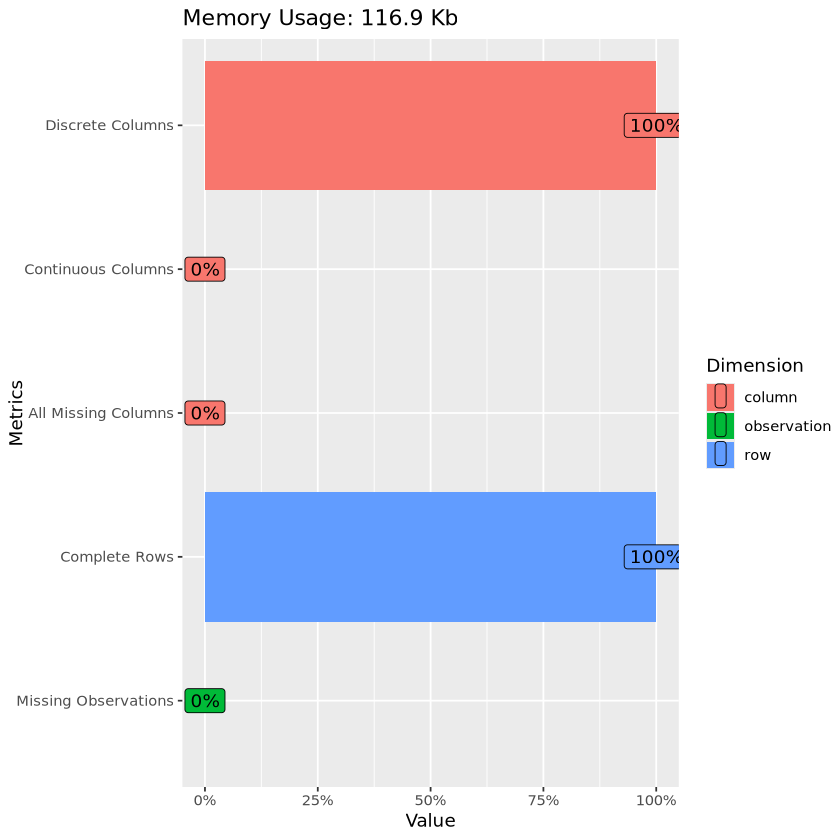

In [57]:
mg_cities |> 
    DataExplorer::plot_intro()

#### tse_ibge

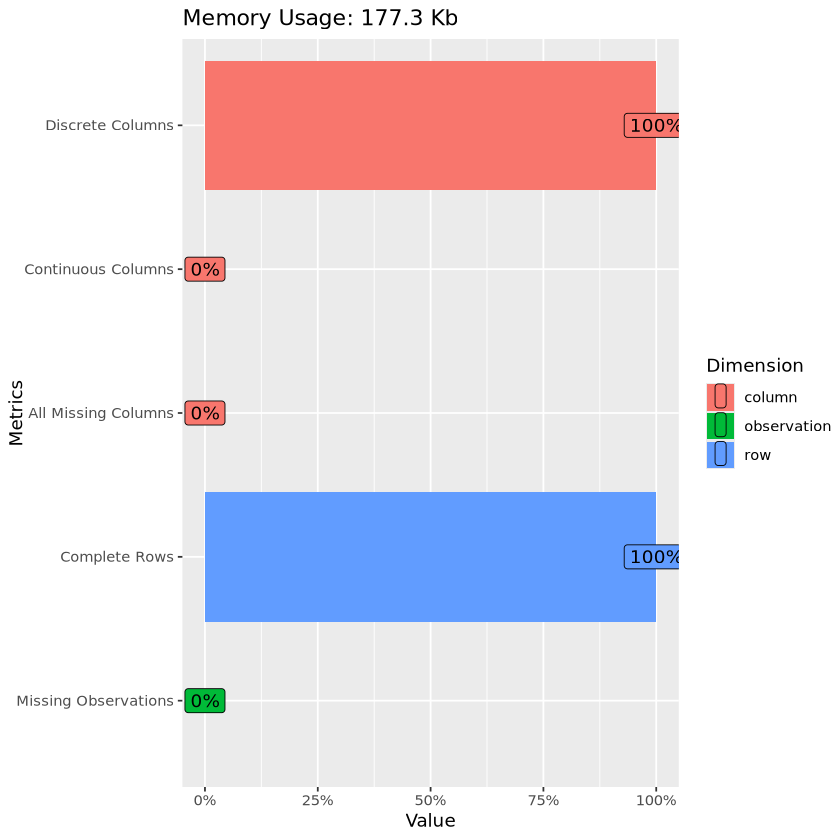

In [58]:
tse_ibge |> 
    DataExplorer::plot_intro()

#### partidos

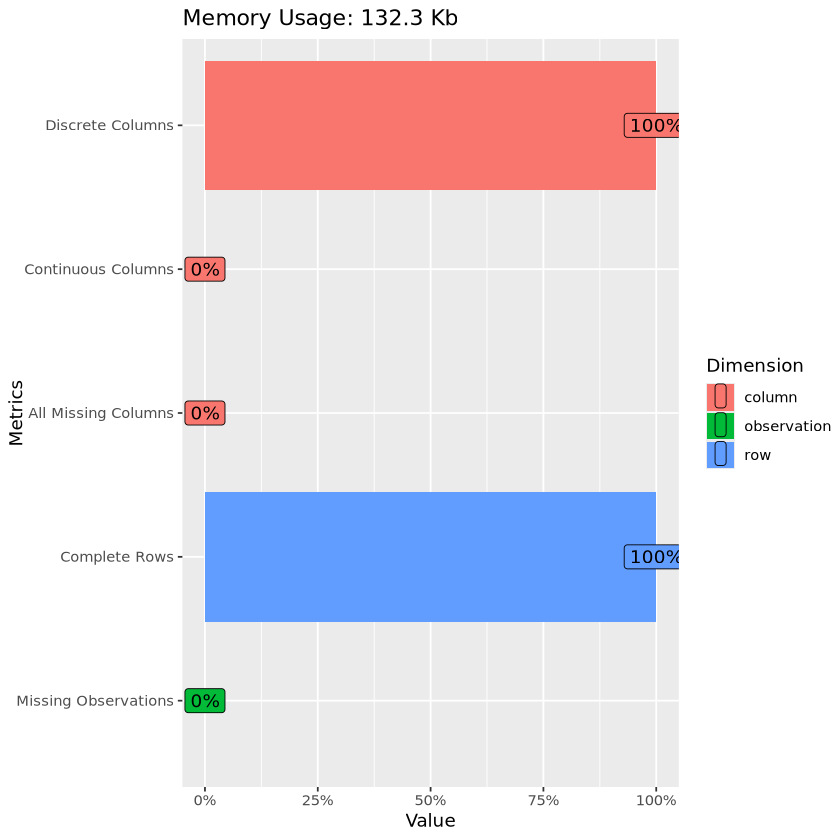

In [59]:
plot_intro(partidos)

2 columns ignored with more than 50 categories.
municipio: 853 categories
prefeito: 831 categories




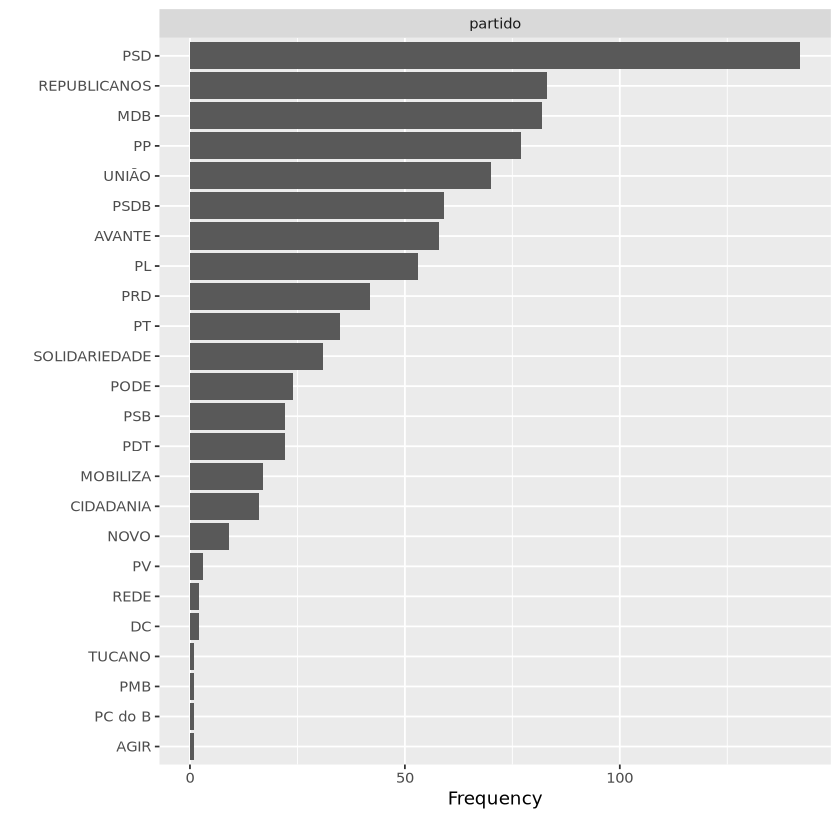

In [60]:
plot_bar(partidos)

#### despesas

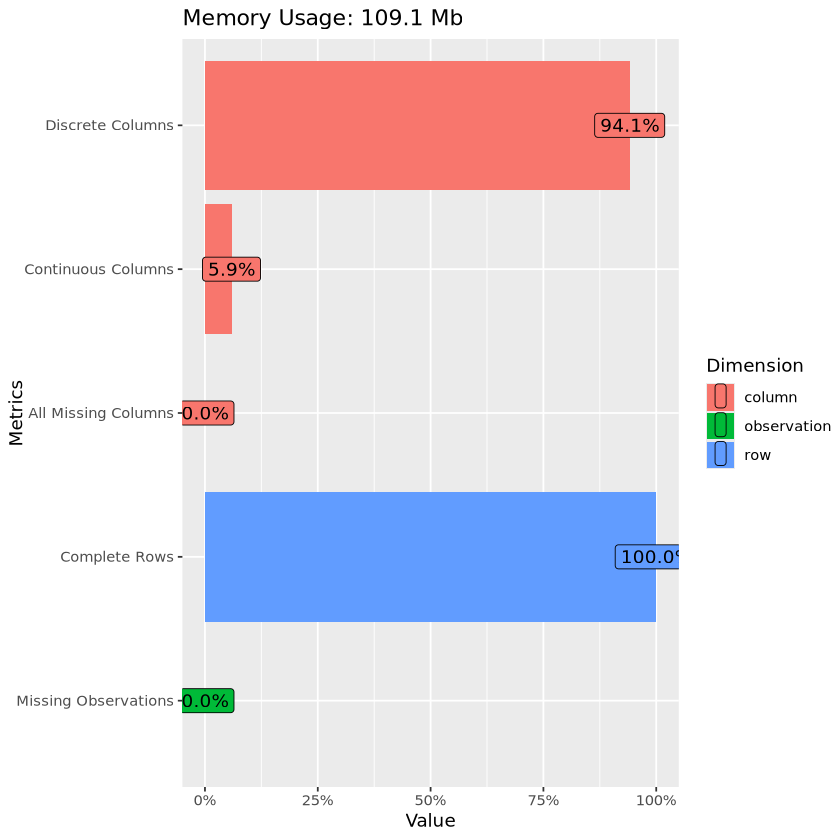

In [61]:
plot_intro(despesas)

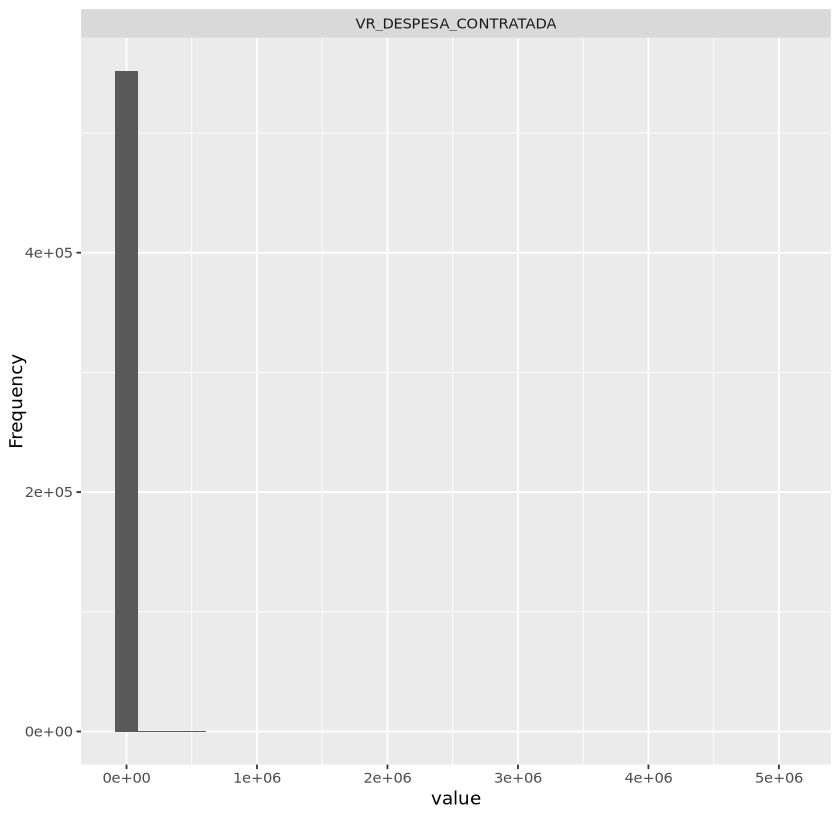

In [62]:
plot_histogram(despesas)

7 columns ignored with more than 50 categories.
SG_UE: 853 categories
NM_UE: 853 categories
SQ_CANDIDATO: 70659 categories
NR_CANDIDATO: 7310 categories
NM_CANDIDATO: 69256 categories
NM_FORNECEDOR: 203560 categories
SQ_DESPESA: 355900 categories




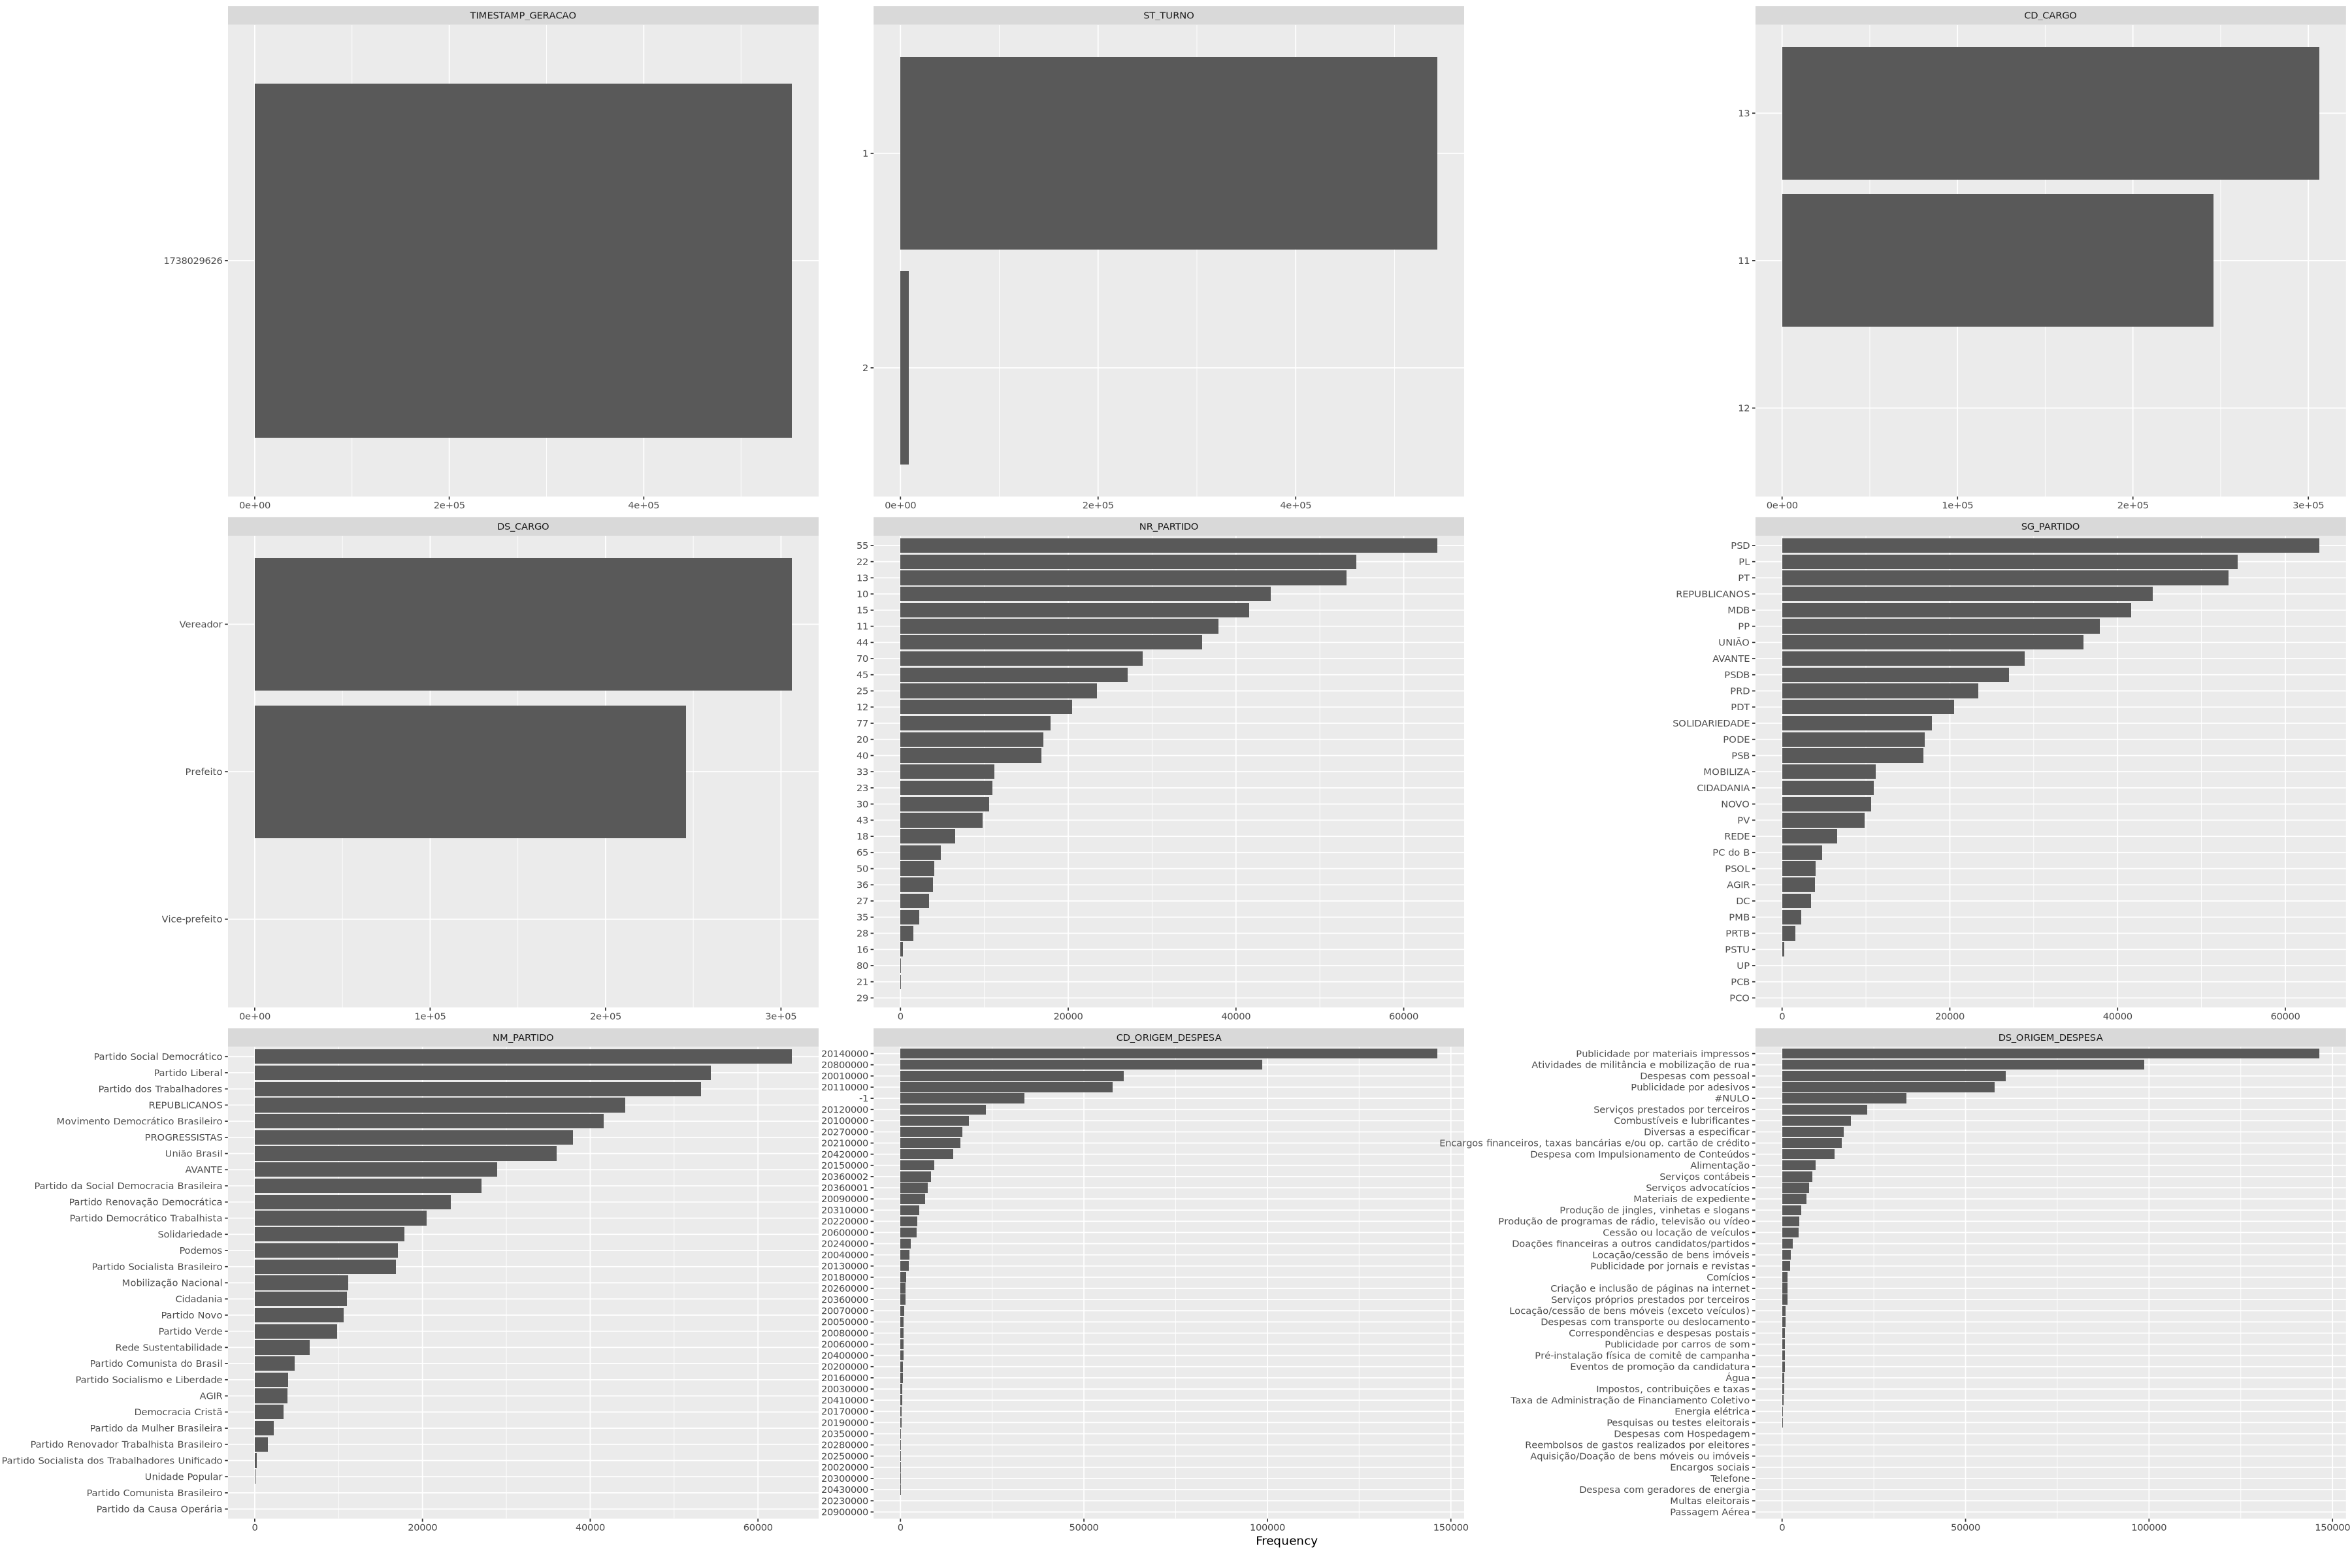

In [75]:
options(repr.plot.width = 30, repr.plot.height = 20)
plot_bar(despesas)

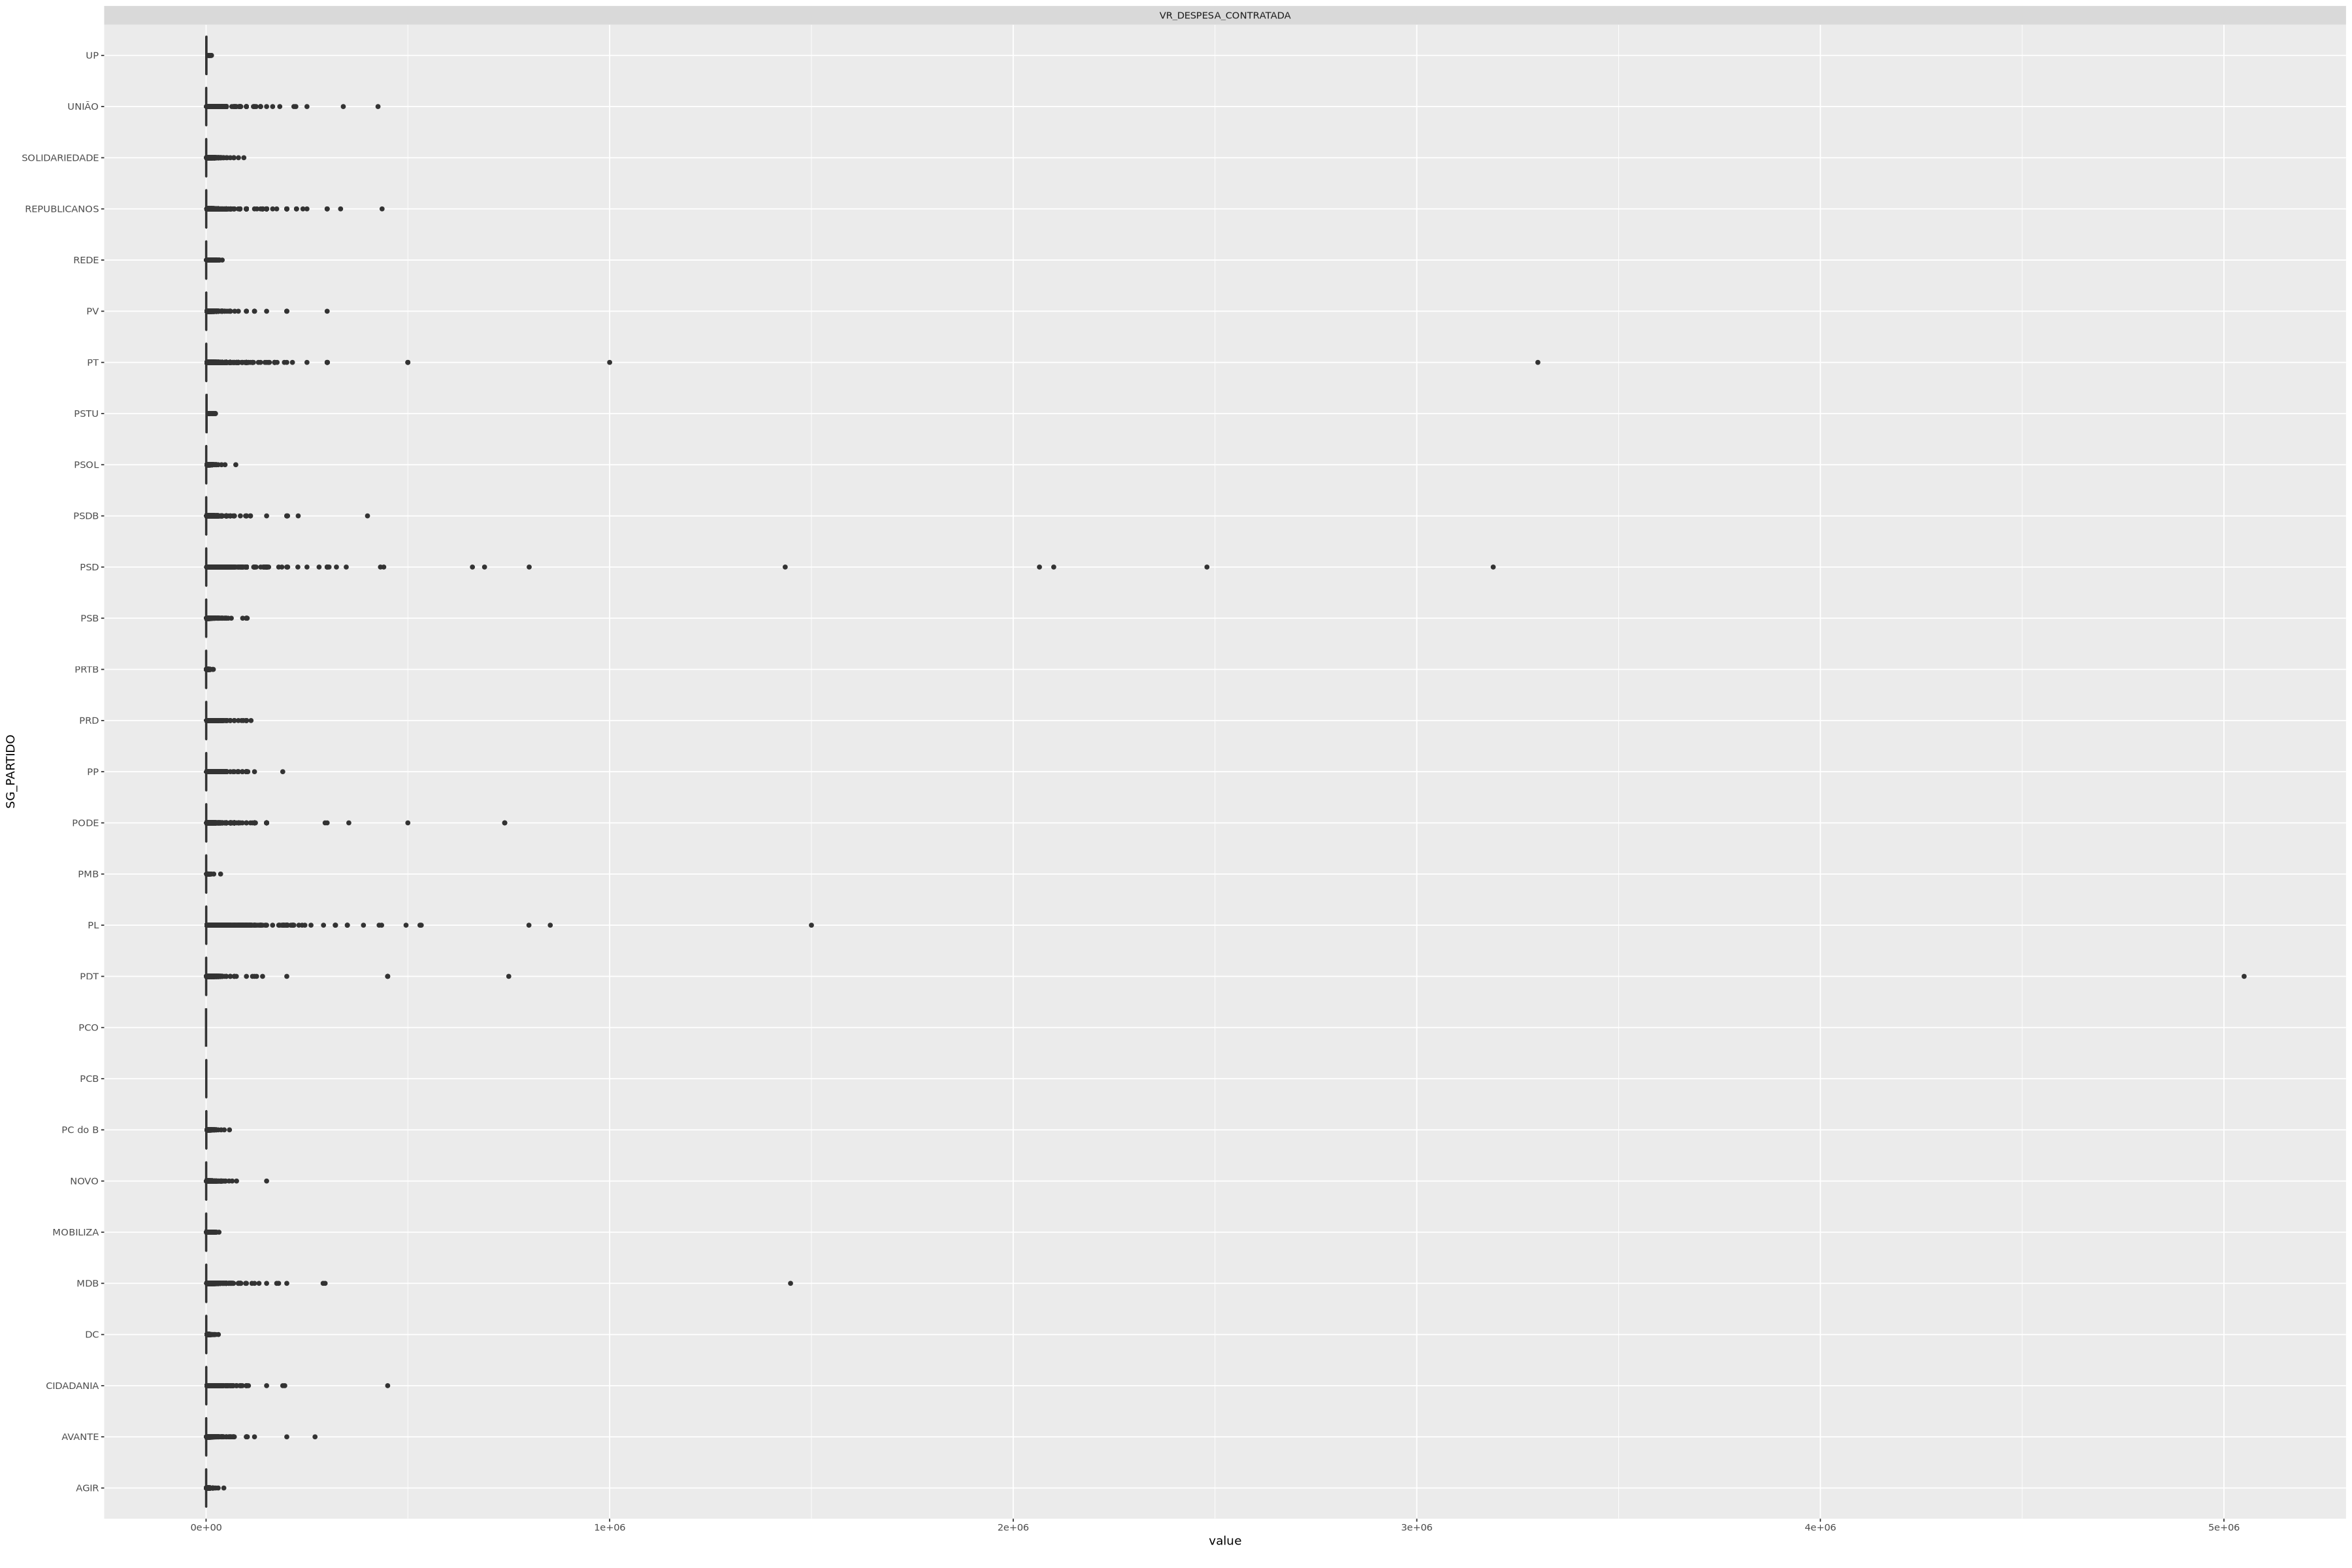

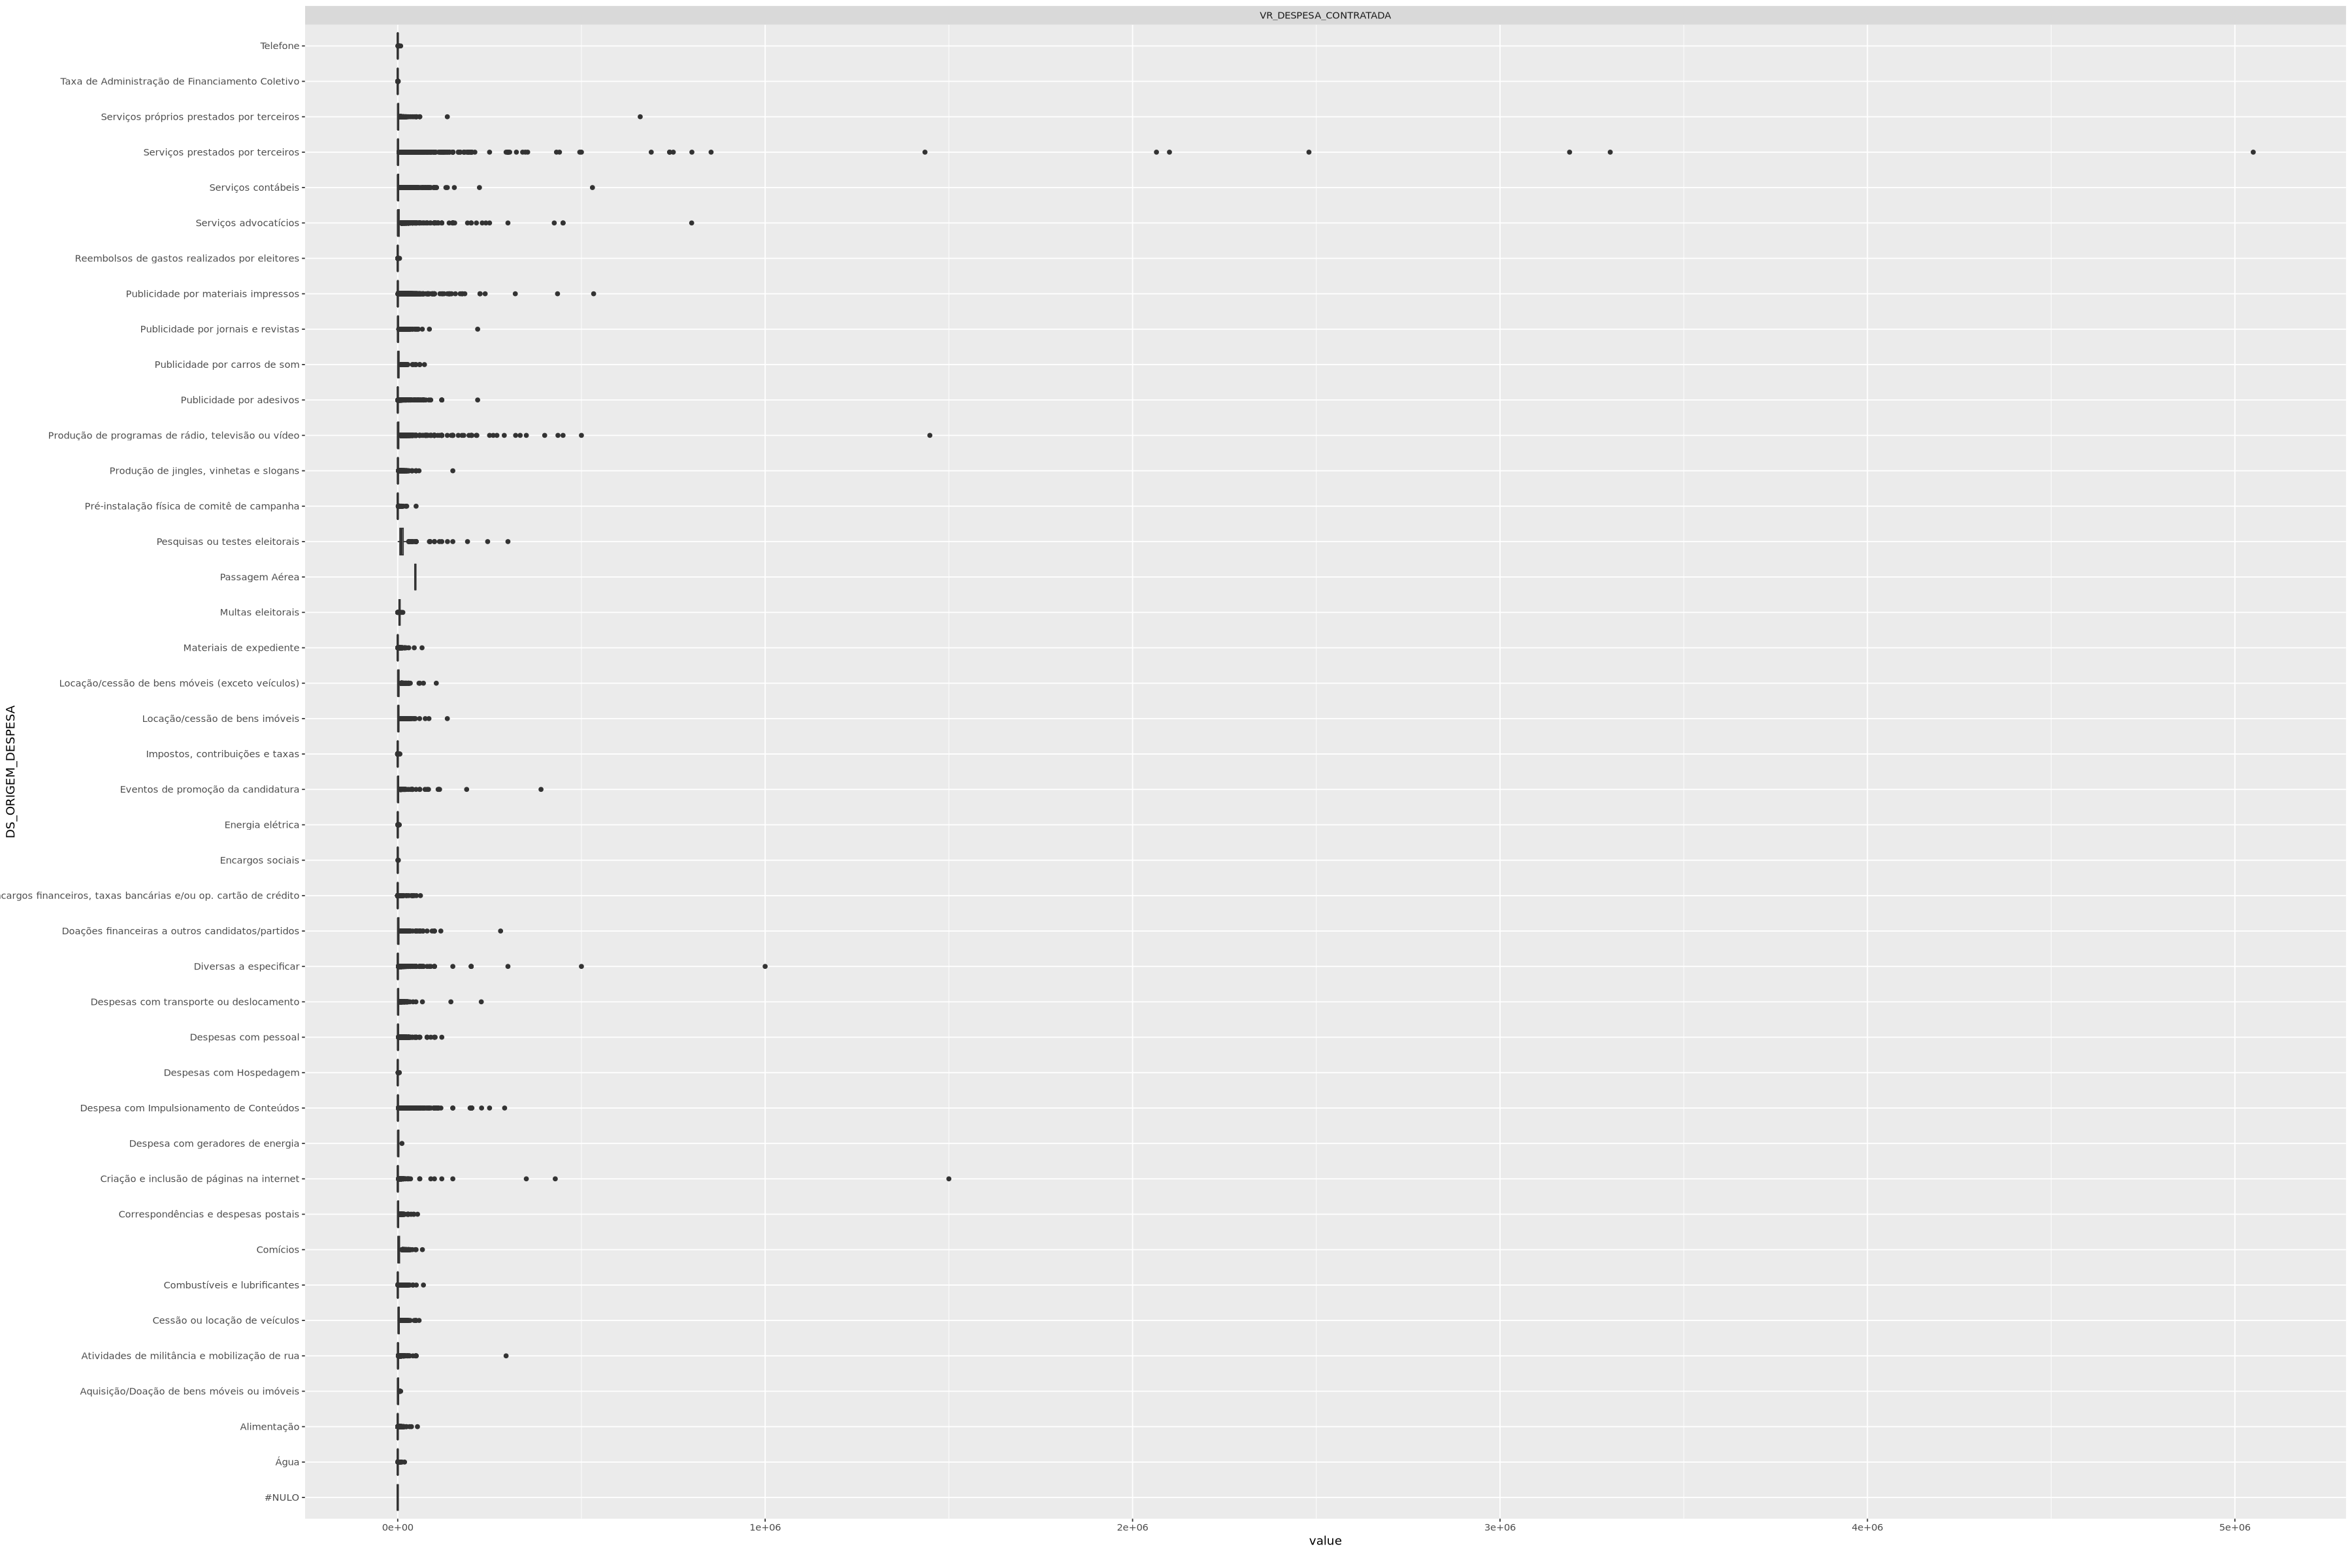

In [ ]:
# Ajustando a configuração de múltiplos gráficos
par(mfrow = c(1, 2))  # Organiza em 1 linha e 2 colunas

# Gerando os gráficos
plot_boxplot(despesas, by = 'SG_PARTIDO')
plot_boxplot(despesas, by = 'DS_ORIGEM_DESPESA')

# Resetando a configuração para o padrão
par(mfrow = c(1, 1))

### 3.3. <a id='toc3_3_'></a>[Time Series Analysis](#toc0_)

### Spatial Analysis

## 4. <a id='toc4_'></a>[Data Preparation](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Data Cleaning](#toc0_)

### 4.2. <a id='toc4_2_'></a>[Feature Selection](#toc0_)

## 5. <a id='toc5_'></a>[Evaluate Algorithms and Models](#toc0_)

### 5.1. <a id='toc5_1_'></a>[Train/Test Split](#toc0_)

### 5.2. <a id='toc5_2_'></a>[Test Options and Evaluation Metrics](#toc0_)

### 5.3. <a id='toc5_3_'></a>[Compare Models and Algorithms](#toc0_)

#### 5.3.1. <a id='toc5_3_1_'></a>[Machine Learning models-scikit-learn](#toc0_)

Regression and Tree Regression Algorithms

Neural Network Algorithms


Ensable Models

#### 5.3.2. <a id='toc5_3_2_'></a>[Time Series based Models-ARIMA and LSTM](#toc0_)

## 6. <a id='toc6_'></a>[Model Tuning and Grid Search](#toc0_)

## 7. <a id='toc7_'></a>[Finalise the model](#toc0_)

### 7.1. <a id='toc7_1_'></a>[Result on the test dataset](#toc0_)

### 7.2. <a id='toc7_2_'></a>[Save Model for Later Use](#toc0_)